$$\text{Project Title}$$ 
&nbsp; 
$$\text{Developing Two Classes}$$    

$$\text{1. Check Linear Regression assumptions}$$     

$$\text{2. Model Selection}$$   
 
***
***
&nbsp; 

$$\text{Group Members:}$$
$$Tomiwa$$
$$Sajjad$$
$$Iman$$ 
$$Ying$$  

&nbsp; 


$$Instructor:$$
$$\text{Dr. Shuteng Niu}$$

&nbsp; 


$$\text{Fall 2022}$$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

all_path = {
    'ying_xie'        : "/content/drive/MyDrive/6010_project/Data set",
    'tomiwa_omotesho' : "/content/drive/MyDrive/CS 6010 Project/Data set",
    'sajjad_rezvani boroujeni'  : "/content/drive/MyDrive/Data set",
    'iman_khazrak'    : "/content/drive/MyDrive/4. BGSU/1. Courses/7. 6010_Data_Science/00. Project/6010_project/Data set",
}
import json


# Read JSON file
my_info_addr = '/content/drive/MyDrive/Colab Notebooks/my_info.json'

try:
    with open(my_info_addr) as data_file:
        my_info = json.load(data_file)
    full_name = my_info['firstname'].lower()+'_'+my_info['lastname'].lower()
    main_path = all_path[full_name]
except:
    main_path = "/content"
print(full_name, main_path, sep='\n')

Mounted at /content/drive
sajjad_rezvani boroujeni
/content/drive/MyDrive/Data set


# 0.&nbsp;Libraries

In [ ]:
# Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Operating System libraries
import os 
import sys
import subprocess 
import zipfile 

# # Date and time libraries
# import time
# import datetime

# Scientific Python libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import itertools
# from itertools import chain, combinations
import statsmodels.stats.stattools as stools
import copy
import math

# Scientific Python libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline


# Scraping and text libraries
import requests 
import re 

# Machine Learning #############################################################

# Sklearn metrics
from sklearn import metrics
from sklearn.metrics import r2_score

# K-fold Cross Validation
import sklearn
from sklearn.model_selection import GridSearchCV

# Regression metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import ShuffleSplit


# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

# Regressions --------------------------------------------------------
## Multiple linear regression
from sklearn.linear_model import LinearRegression

## Stepwise variable selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

## Ridge Regression
from sklearn.linear_model import Ridge

## Lasso Regression
from sklearn.linear_model import Lasso

## Elastic net Regression
from sklearn.linear_model import ElasticNet

## Principal Component Regression (PCR)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale


## KNN (K Nearest Neighbors)
from sklearn.neighbors import KNeighborsRegressor

## Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


## Boosting
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor

## XG Boosting
try: 
    from xgboost import XGBRegressor
except:
    !pip install xgboost
    from xgboost import XGBRegressor

## Neural Networks
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import *
from inspect import signature
from sklearn.neural_network import MLPRegressor

## Random forest
from sklearn.ensemble import RandomForestRegressor



# 1.&nbsp;Classes

## 1.1. Linear regression Assumptions

In [ ]:
class regression_analysis:
    """
    Methods:
    1.  linearity_assumption                        : To check the linearity assumption through ploting response vs. regressors.
    2.  zero_mean_and_constant_variance_assumption  : To check the zero mean and constant variance assumption through ploting residuals (random errors) vs. fitted values.
    3.  independency_assumption                     : To check the independency assumption through ploting residuals (random errors) vs. the indexes (row numbers) of sorted values of each regressors. 
    4.  normality_assumption                        : To check the normality assumption through qq-plot and Shapiro-Wilk normality test.
    5.  corr_plot                                   : To visualize the correlation of a dataframe Using a heatmap.
    6.  vif                                         : To check multicollinearity. VIF (Variance Inflation Factor)

    """

    ## 0. ----------------------------------------------
    @staticmethod
    def mlr(df0, response_variable):
        Y_ml = df0.loc[:, response_variable]
        X_ml = df0.filter( items=[col for col in df0.columns if col!=response_variable] )

        # Define a model
        model1 = LinearRegression()

        # Cross validation(train_validation_test)
        X_train, X_test, Y_train, Y_test = train_test_split(X_ml, Y_ml, test_size=0.2, random_state=0)
        grid1 = GridSearchCV(model1, param_grid={}, cv=5, scoring="neg_root_mean_squared_error")
        fit1 = grid1.fit(X_train, Y_train) # fit1 is the line equation of regression line (fitted line).
        Yhat = fit1.predict(X_test) # X_test will be replaced by X_new.
        RMSE_GridSearchCV = metrics.mean_squared_error(Y_test, Yhat, squared=False)

        print( "{0:7s} = {1:7.2f} \n".format("RMSE ", RMSE_GridSearchCV))
        # display( fit1.cv_results_) 

        print( "{0:7s} = {1:7.2f} \n".format("R^2", r2_score(Y_test, Yhat)))

        reg_coefs = [fit1.best_estimator_.intercept_.tolist()] + fit1.best_estimator_.coef_.tolist()
        betas = ["beta"+str(i) for i in range(len(reg_coefs))]
        for i in range(len(betas)):
            print("{0:7s} = {1:7.2f}".format(betas[i], reg_coefs[i]))

        return X_train, X_test, Y_train, Y_test, Yhat

    ## 1. ----------------------------------------------
    @staticmethod
    def linearity_assumption(df0, response_variable):
        """
        Description : To check the linearity assumption through ploting response vs. regressors.
        Parameters  : df0 (datafreame)
                      response_variable (str): The header of the response variable column.
        Returns     : None
        """
        Y_ml = df0.loc[:, response_variable]
        X_ml = df0.filter( items=[col for col in df0.columns if col!=response_variable] )
        # Plot: response vs. regressors
        sns.set_theme()
        fig_cols = 3
        fig_rows = math.ceil(X_ml.shape[1]/fig_cols)
        fig, ax=plt.subplots(fig_rows,fig_cols, figsize=(15, fig_rows*3), constrained_layout=True)
        fig.set_constrained_layout_pads(w_pad=.2, h_pad=.2, hspace=0., wspace=0.)
        for axx, col in zip(ax.flatten(), X_ml.columns):
            # plt.figure( figsize=(10,16))
            # plt.subplot(5,4,i+1)
            axx.scatter(df0.loc[:, col], df0.loc[:, response_variable]) 
            axx.set_title('To check "Linearity Assumption"')
            axx.set_xlabel(col ) 
            axx.set_ylabel( response_variable )
            # m, b = np.polyfit(df0.loc[:, col], df0.loc[:, response_variable], 1)
            # axx.plot(df0.loc[:, col], m*df0.loc[:, col]+b, color="red") 


    ## 2. ----------------------------------------------
    @staticmethod
    def zero_mean_and_constant_variance(Y_test, Yhat):
        """
        Description : To check the zero mean and constant variance assumption through ploting residuals vs. fitted values.
        Parameters  : Y_test (series)
                      Yhat (series)
        Returns     : None
        """

        residuals = (Y_test - Yhat)
        # Plot: residuals vs. fitted values
        sns.set_theme()
        plt.scatter(Yhat, residuals)
        plt.title('To check "Zero mean" & "Constant variance"')
        plt.xlabel('Fitted values') 
        plt.ylabel('Residuals') 
        plt.axhline(y=0.0, color='r', linestyle='-')
        plt.show()


    ## 3. ----------------------------------------------
    @staticmethod
    def independency_assumption(df0, response_variable, X_test, Y_test, Yhat):
        """
        Description : To check the independency assumption through ploting residuals (random errors) vs. the indexes (row numbers) of sorted values of each regressors.
        Parameters  : df0 (dataframe)
                      response_variable (float)
                      X_test (series)
                      Y_test (series)
                      Yhat (series)
        Returns     : None
        """

        ###Y_ml = df0.loc[:, response_variable]
        X_ml = df0.filter( items=[col for col in df0.columns if col!=response_variable] )
        X_columns = X_ml.columns
        residuals = (Y_test - Yhat)
        x_values = [i+1 for i in range(len(residuals))]
        # Plot: Sorted residuals vs. the indexes of sorted values of each regressors
        sns.set_theme()
        fig_cols = 2
        fig_rows = math.ceil(X_ml.shape[1]/fig_cols)
        fig, ax=plt.subplots(fig_rows,fig_cols, figsize=(15, fig_rows*5), constrained_layout=True)
        fig.set_constrained_layout_pads(w_pad=.2, h_pad=.2, hspace=0., wspace=0.)
        for axx, col in zip(ax.flatten(), X_columns):
            indexes = X_test.loc[:, col].sort_values().index
            sorted_residuals = residuals.loc[indexes]
            axx.scatter( indexes, sorted_residuals ) 
            axx.set_title( f"Sorted residuals vs. the indexes of sorted {col}" )
            axx.set_xlabel( f"Indexes of sorted {col}" )
            axx.set_ylabel( f"Sorted Residuals based on sorted {col}" ) 
            axx.axhline(  y=0.0, color='r', linestyle='-') 


    ## 4. ----------------------------------------------
    @staticmethod
    def normality_assumption(Y_test, Yhat):
        """
        Description : To check the normality assumption through qq-plot and Shapiro-Wilk normality test.
        Parameters  : Y_test (series)
                      Yhat (series)
        Returns     : None
        """
        residuals = (Y_test - Yhat)
        # Plot: qq-plot
        sns.set_theme()
        scipystats.probplot(residuals, dist="norm", plot=plt);
        plt.show()
        # Shapiro-Wilk normality test 
        print("\033[1mShapiro–Wilk test\033[0m:")
        print("\n 1. The Shapiro–Wilk test is more appropriate method for small sample sizes ( n<50 ).")
        print("\n 2. ", scipystats.shapiro(residuals) )
        if scipystats.shapiro(residuals).pvalue <= 0.05:
            print(f"\n 3. As \033[1mp-value = {scipystats.shapiro(residuals).pvalue:.2f}\033[0m which is less than 0.05, \033[1mthe normality assumption is rejected\033[0m.")
        elif scipystats.shapiro(residuals).pvalue > 0.05:
            print(f"\n 3. As \033[1mp-value = {scipystats.shapiro(residuals).pvalue:.2f}\033[0m which is more than 0.05, it only allows us to state that \033[1mno significant departure from normality was found\033[0m.")


    ## 5. ----------------------------------------------
    @staticmethod
    def corr_plot(df0):
        """
        Description : To visualize the correlation of a dataframe Using a heatmap. 
        Parameters  : df0 (dataframe): The dataframe we want to plot its corrplot.
        Returns     : None
        """
        sns.set_theme()
        sns.set(rc={'figure.figsize':(df0.shape[1],df0.shape[1])})
        corr1 = df0.corr()
        ax = sns.heatmap(
            corr1,
            vmin=-1, vmax=1, center=0,
            cmap = sns.diverging_palette(20, 220, n=256),
            annot=True 
        )
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment = "right"
        );
        plt.show()


    ## 6. ----------------------------------------------
    @staticmethod
    def vif(df0, response_variable):
        """
        Description : To check multicollinearity. VIF (Variance Inflation Factor)    
        Parameters  : df0 (datafreame)
                    response_variable (str): The header of the response variable column.
        Returns     : df_vif_result (dataframe)
        """
        df_vif = df0.drop(columns=response_variable)
        df_vif_result = pd.DataFrame(columns=["Variables", "R2", "VIF"])
        for col1 in df_vif.columns:
            Y_vif = df_vif.loc[:, col1] 
            X_vif = df_vif.drop(columns=f'{col1}')
            r2_vif = smf.ols('Y_vif~X_vif', df_vif).fit().rsquared 
            df_vif_result.loc[df_vif_result.shape[0]] = [col1, r2_vif, 1/(1-r2_vif)] 
        return df_vif_result  


 

# Call the class
regression_analysis1 = regression_analysis()  #; print(regression_analysis1.__doc__) ; print( help(regression_analysis1) )


## 1.2. Model Selection

In [ ]:
class model_selection:
    """
    Methods:
    1. regression                    :  To do a regression which it could be any regression model.
    2. best_regression               :  To do 11 regression models and choose the best one based on their RMSE.
    3. bar_chart_1                   :  To plot the RMSE of mutiple regression models to choose the best model.
    """


    # 1. ----------------------------------------------
    @staticmethod
    def regression(model1, X_train, X_test, Y_train, Y_test):
        """
        Description : To do a regression which it could be any regression model.
        Parameters  : model1 (ML model): It could be any regression model.
                      X_train (dataframe)
                      X_test (dataframe)
                      Y_train (Series) 
                      Y_test (Series)
        Returns     : rmse (float): Root of mean squared error
        """
        grid1 = GridSearchCV(model1, param_grid={}, cv=5, scoring="neg_root_mean_squared_error")
        fit1 = grid1.fit(X_train, Y_train) 
        Yhat = fit1.predict(X_test) 
        # rmse = metrics.mean_squared_error(Y_test, Yhat, squared=False)
        rmse = np.sqrt(metrics.mean_squared_error(Y_test, Yhat))

        return rmse


    # 2. ----------------------------------------------
    def best_regression(self, df0, response_variable):
        """
        Description : To do 11 regression models and choose the best one based on their RMSE.
        Parameters  : df0 (dataframe): The desired dataframe.
                      response_variable (str): The name of the response variable.
        Returns     : None
        """
        Y_ml = df0.loc[:, response_variable]
        X_ml = df0.filter( items=[col for col in df0.columns if col!=response_variable] ) 
        # Cross validation(train_validation_test)
        X_train, X_test, Y_train, Y_test = train_test_split(X_ml, Y_ml, test_size=0.2, random_state=0)

        # RMSE Dataframe: A dataframe to collect the RMSE of the models in it.
        df_rmse = pd.DataFrame(columns=["Models", "RMSE"])

        # models
        ## 1. Linear regression
        model1 = LinearRegression()
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Linear regression", rmse]

        ## 2. Ridge
        model1 = Ridge()
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Ridge", rmse]

        ## 3. Lasso
        model1 = Lasso()
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Lasso", rmse]

        ## 4. Elastic Net
        model1 = ElasticNet(alpha=0.5)
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Elastic Net", rmse]  

        ## 5. PCA
        pca1 = PCA(n_components=4)
        # X_pca = pca1fit_transform(scale(X_ml))
        model1 = LinearRegression()
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["PCA", rmse] 


        ## 6. KNN (K Nearest Neighbors)
        model1 = KNeighborsRegressor(n_neighbors=3)
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["KNN", rmse]  

        ## 7. Decision Tree
        model1 = tree.DecisionTreeRegressor(random_state=0)
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Decision Tree", rmse]  

        ## 8. Boosting
        model1_param = {'n_estimators': 500,
                        'max_depth': 4,
                        'min_samples_split': 5,
                        'learning_rate': 0.01,
                        'loss': 'squared_error'}
        model1 = ensemble.GradientBoostingRegressor(**model1_param)
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Boosting", rmse] 

        ## 9. XG Boost
        model1 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, 
                            subsample=0.7, colsample_bytree=0.8, 
                            objective="reg:squarederror")
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["XG Boost", rmse] 

        ## 10. Neural Network
        model1 = MLPRegressor(activation='relu', solver='lbfgs', alpha=1e-5, 
                            hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Neural Network", rmse] 

        ## 11. Random Forest
        model1 = RandomForestRegressor()
        rmse = self.regression(model1, X_train, X_test, Y_train, Y_test)
        df_rmse.loc[df_rmse.shape[0]] = ["Random Forest", rmse]  

        # To save df_rmse
        df_rmse.to_csv("RMSE_model_selection.csv", index=False)
        df_rmse = pd.read_csv("RMSE_model_selection.csv") 
        df_rmse = df_rmse.sort_values(by=["RMSE"], ascending=True).reset_index(drop=True)
        display( "df_rmse:", df_rmse.shape, df_rmse )

        # RMSE bar chart
        df_rmse = df_rmse.sort_values(by=["RMSE"], ascending=False).reset_index(drop=True) 
        self.bar_chart_1(df_rmse)
        
        
    ## 3. ----------------------------------------------
    @staticmethod
    def bar_chart_1(df_metrics):
        """
        Description : To plot the RMSE of mutiple regression models in order to find the best model.
        Parameters  : df_metrics (dataframe): The dataframe with these columns ["Models", "RMSE"] or ["Models", "kappa"]
        Return      : None
        """
        sns.set_theme()
        df_metrics.plot.barh(
            x="Models", 
            y=df_metrics.columns[1],
            title=df_metrics.columns[1],
            figsize=(10,15),
            fontsize=12,
            colormap="tab20b"
        )
        # for index, value in enumerate(df_metrics.iloc[:, 1]):
        #     plt.text(value, index, " " + str(round(value,2)))
        plt.show()

# Call the class
model_selection1 = model_selection() #; print(model_selection1.__doc__) ; print( help(model_selection1) )

# Example
# df0 = pd.read_csv("autompg.csv") ; display( "df0:", df0.shape, df0.head(1) ) ; print()
# response_variable = "mpg"
# model_selection1.best_regression(df0, response_variable)

# df0 = pd.read_csv("diabetes.csv") ; display( "df0:", df0.shape, df0.head(1) ) ; print()
# response_variable = "Outcome"
# model_selection1.best_classification(df0, response_variable)


# 2.&nbsp;Data Sets

In [ ]:
datasets= os.listdir(main_path)
datasets


['house rental.csv',
 'insurance.csv',
 'house rental data description.docx',
 'Covid Live.csv',
 'covid live data description.docx',
 'Maths.csv',
 'maths data description.docx']

## 2.1. Insurance data set

### 2.1.1. Preprocessing

In [ ]:
df_insurance = pd.read_csv(os.path.join(main_path, 'insurance.csv'))
df_insurance.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [ ]:
df_insurance = df_insurance.astype({
    'sex'     :     'category',
    'smoker'  :     'category',
    'region'  :     'category',
})
df_insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
cat_cols = df_insurance.select_dtypes('category').columns.tolist()
df_dummy_insur = pd.concat([df_insurance.drop(columns= cat_cols), pd.get_dummies(df_insurance.select_dtypes('category'))], axis=1)
print(df_dummy_insur.dtypes)
df_dummy_insur.head()

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


'df_rmse:'

(11, 2)

,Models,RMSE
0,Boosting,4066.717032
1,Random Forest,4277.067716
2,XG Boost,4772.247804
3,Linear regression,5641.626559
4,PCA,5641.626559
5,Lasso,5642.175686
6,Ridge,5644.099419
7,Decision Tree,6699.433685
8,Elastic Net,7303.244125
9,KNN,9560.940687


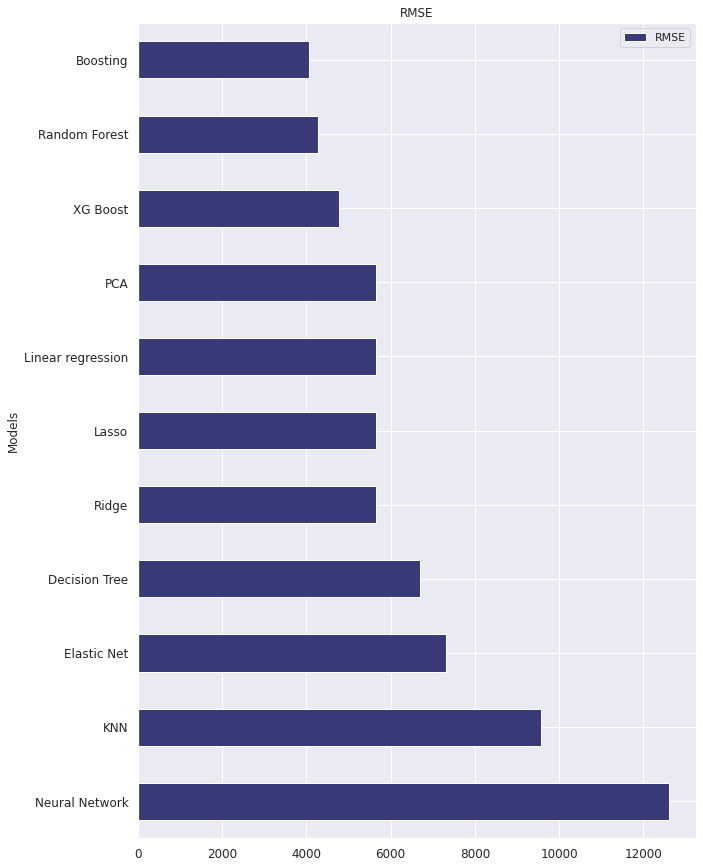

In [ ]:
response_variable = "charges"
model_selection1.best_regression(df_dummy_insur, response_variable)

## 2.2. House Rental

### 2.2.1. Preprocessing

In [ ]:
df_rent = pd.read_csv(os.path.join(main_path, 'house rental.csv'))


In [ ]:
df_rent.isna().sum().sum()

0

In [ ]:
df_rent.iloc[:, 10:].head(1)

,lrent,ltothsg,lrnthsg,lavginc,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90
0,5.283204,10.17225,9.508592,9.353314,.,.,.,.,.,.,20.34676,.,0


In [ ]:
df_rent.dtypes

city          int64
year          int64
pop           int64
enroll        int64
rent          int64
rnthsg        int64
tothsg        int64
avginc        int64
lenroll     float64
lpop        float64
lrent       float64
ltothsg     float64
lrnthsg     float64
lavginc     float64
clenroll     object
clpop        object
clrent       object
cltothsg     object
clrnthsg     object
clavginc     object
pctstu      float64
cpctstu      object
y90           int64
dtype: object

In [ ]:
df_rent.select_dtypes('object')[df_rent.clenroll=="."]

,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,cpctstu
0,.,.,.,.,.,.,.
2,.,.,.,.,.,.,.
4,.,.,.,.,.,.,.
6,.,.,.,.,.,.,.
8,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...
118,.,.,.,.,.,.,.
120,.,.,.,.,.,.,.
122,.,.,.,.,.,.,.
124,.,.,.,.,.,.,.


In [ ]:
object_cols = ['clenroll', 'clpop', 'clrent', 'cltothsg', 'clrnthsg', 'clavginc', 'cpctstu']
df_rent[object_cols] = df_rent[object_cols].replace({".": np.nan},  regex=True)
df_rent.head()

,city,year,pop,enroll,rent,rnthsg,tothsg,avginc,lenroll,lpop,...,lavginc,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90
0,1,80,75211,15303,197,13475,26167,11537,9.635804,11.22805,...,9.353314,NaN,NaN,NaN,NaN,NaN,NaN,20.34676,NaN,0
1,1,90,77759,18017,342,15660,29467,19568,9.799071,11.26137,...,9.881651,NaN,NaN,NaN,NaN,NaN,NaN,23.17031,NaN,1
2,2,80,106743,22462,323,14580,37277,19841,10.019580,11.57818,...,9.895506,NaN,NaN,NaN,NaN,NaN,NaN,21.04307,NaN,0
3,2,90,141865,29769,496,26895,55540,31885,10.301220,11.86263,...,10.369890,NaN,NaN,NaN,NaN,NaN,NaN,20.98403,NaN,1
4,3,80,36608,11847,216,7026,13482,11455,9.379830,10.50802,...,9.346182,NaN,NaN,NaN,NaN,NaN,NaN,32.36178,NaN,0


In [ ]:
df_rent.iloc[:, 10:].head(1)

,lrent,ltothsg,lrnthsg,lavginc,clenroll,clpop,clrent,cltothsg,clrnthsg,clavginc,pctstu,cpctstu,y90
0,5.283204,10.17225,9.508592,9.353314,NaN,NaN,NaN,NaN,NaN,NaN,20.34676,NaN,0


In [ ]:
df_rent.isna().sum()


city          0
year          0
pop           0
enroll        0
rent          0
rnthsg        0
tothsg        0
avginc        0
lenroll       0
lpop          0
lrent         0
ltothsg       0
lrnthsg       0
lavginc       0
clenroll    128
clpop       128
clrent      128
cltothsg    128
clrnthsg    128
clavginc    128
pctstu        0
cpctstu     128
y90           0
dtype: int64

In [ ]:
df_rent_final = df_rent.drop(columns= object_cols)
df_rent_final.dtypes

city         int64
year         int64
pop          int64
enroll       int64
rent         int64
rnthsg       int64
tothsg       int64
avginc       int64
lenroll    float64
lpop       float64
lrent      float64
ltothsg    float64
lrnthsg    float64
lavginc    float64
pctstu     float64
y90          int64
dtype: object

# 3.&nbsp;Result

## 3.1 Insurance Dataset

### 3.1.1. Linear Regression Assumption

#### 3.1.0. MLR

In [ ]:
X_train, X_test, Y_train, Y_test, Yhat = regression_analysis1.mlr(df_dummy_insur, "charges")

RMSE    = 5641.63 

R^2     =    0.80 

beta0   = -517.14
beta1   =  253.70
beta2   =  335.96
beta3   =  436.91
beta4   =    7.73
beta5   =   -7.73
beta6   = -11802.51
beta7   = 11802.51
beta8   =  483.84
beta9   =  223.71
beta10  = -429.44
beta11  = -278.11


#### 3.1.1. Linearity Assumption

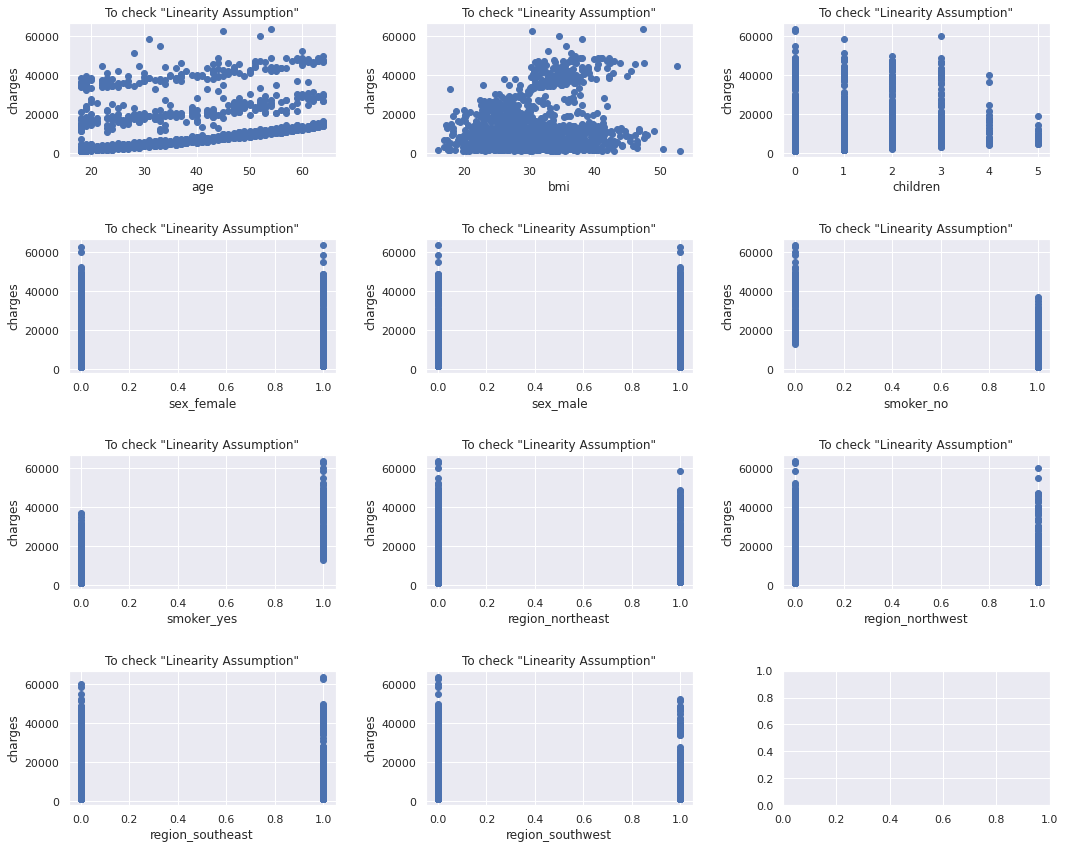

In [ ]:
regression_analysis1.linearity_assumption(df_dummy_insur, "charges")

#### 3.1.2. Zero mean & Constant Variance

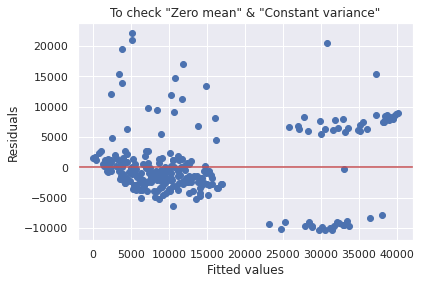

In [ ]:
regression_analysis1.zero_mean_and_constant_variance(Y_test, Yhat)

#### 3.1.3. Independency Assumotion

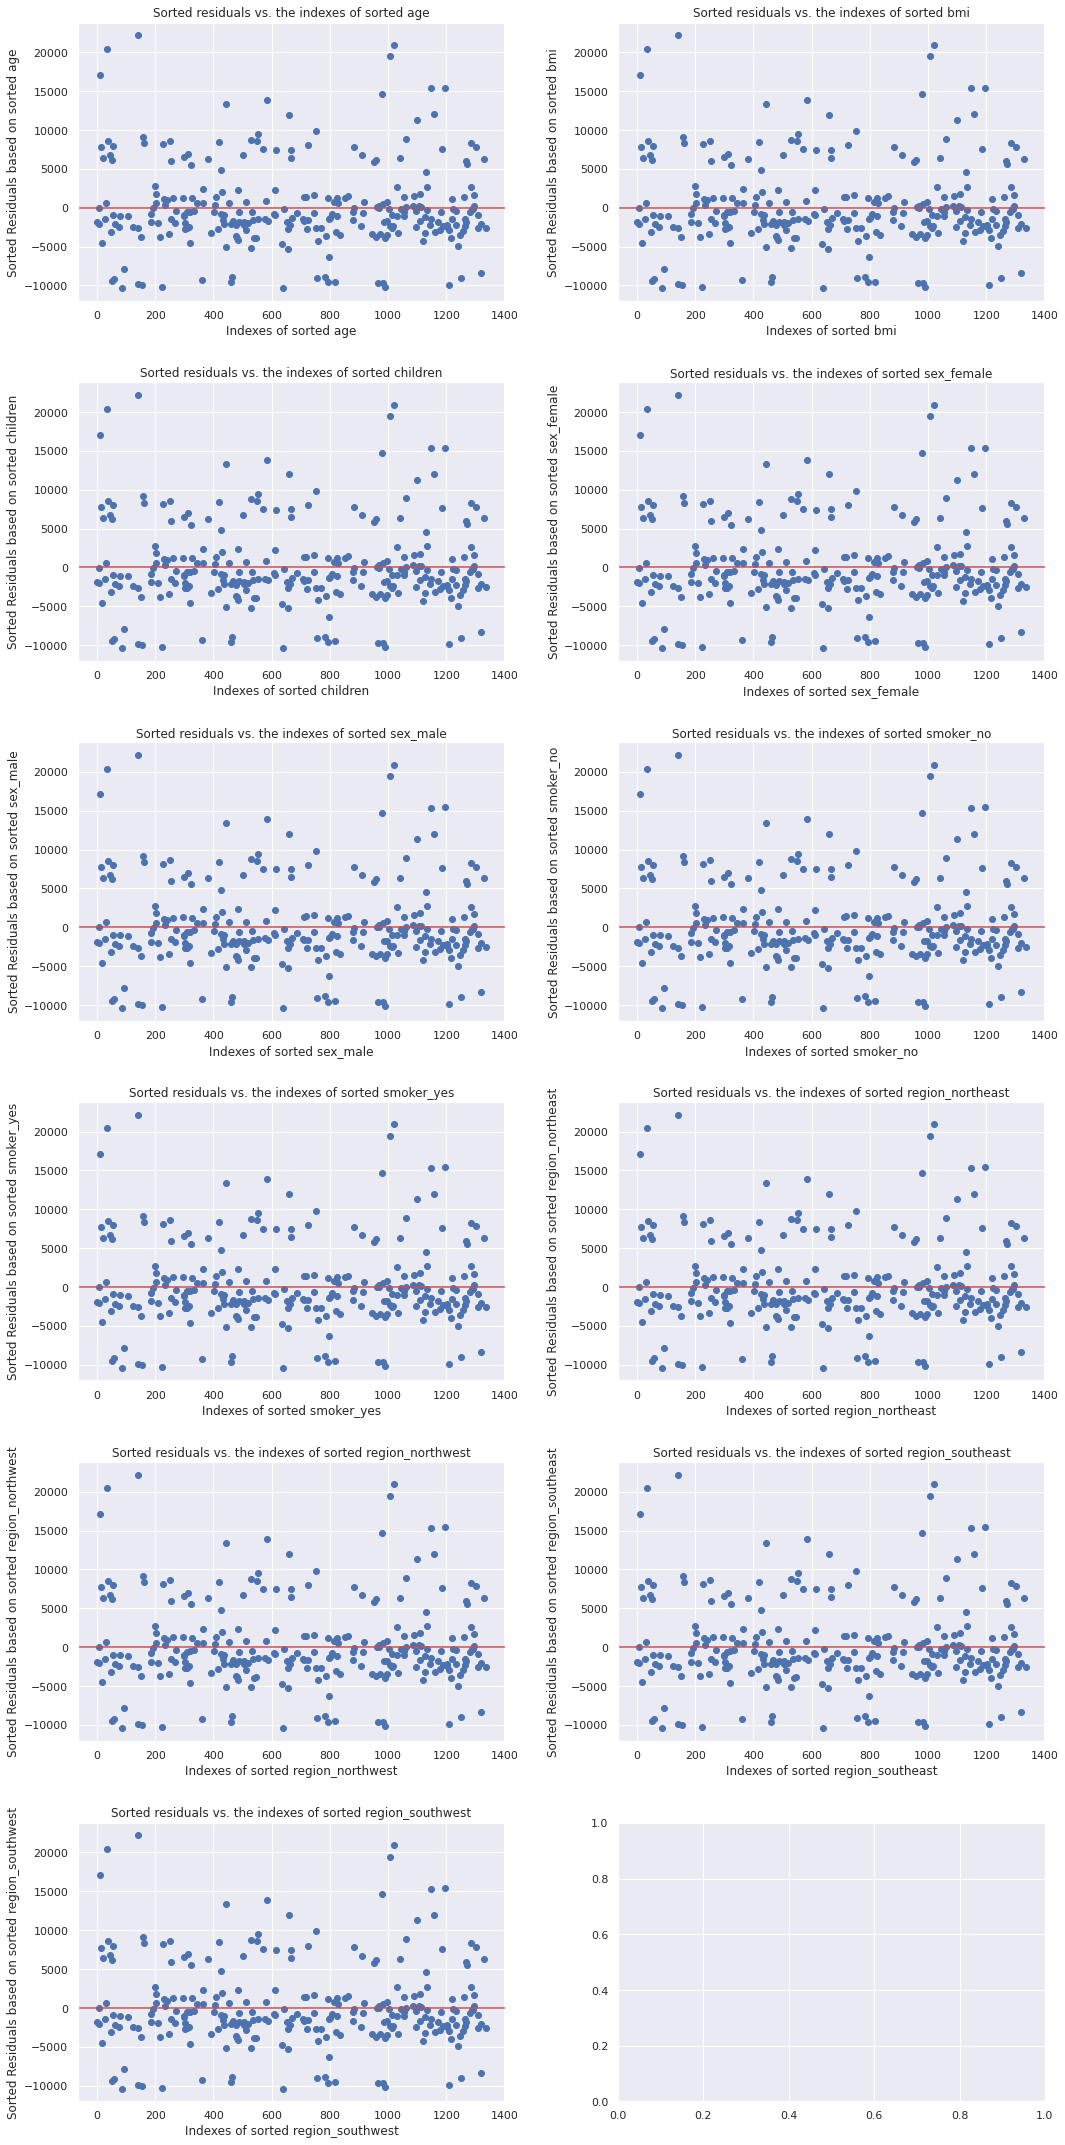

In [ ]:
response_variable= "charges"
regression_analysis1.independency_assumption(df_dummy_insur, response_variable, X_test, Y_test, Yhat)

#### 3.1.4. Normality Assumption

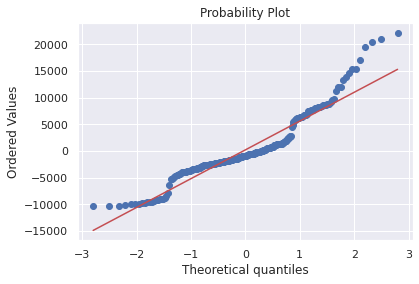

Shapiro–Wilk test:

 1. The Shapiro–Wilk test is more appropriate method for small sample sizes ( n<50 ).

 2.  ShapiroResult(statistic=0.9032657146453857, pvalue=4.221275672761093e-12)

 3. As p-value = 0.00 which is less than 0.05, the normality assumption is rejected.


In [ ]:
regression_analysis.normality_assumption(Y_test, Yhat)

## 3.2. House Rental Dataset

### 3.2.1 Linear Regression assumptions

#### 3.2.1.0. MLR

In [ ]:
X_train, X_test, Y_train, Y_test, Yhat = regression_analysis1.mlr(df_rent_final, "rent")

RMSE    =   23.25 

R^2     =    0.96 

beta0   =  119.21
beta1   =   -0.06
beta2   =   -3.07
beta3   =   -0.00
beta4   =    0.00
beta5   =   -0.00
beta6   =    0.00
beta7   =    0.01
beta8   =  -14.56
beta9   =   64.79
beta10  =  390.06
beta11  =  -47.07
beta12  =  -12.70
beta13  = -198.00
beta14  =   -0.42
beta15  =   -0.31


#### 3.2.1.1. Linearity assumption

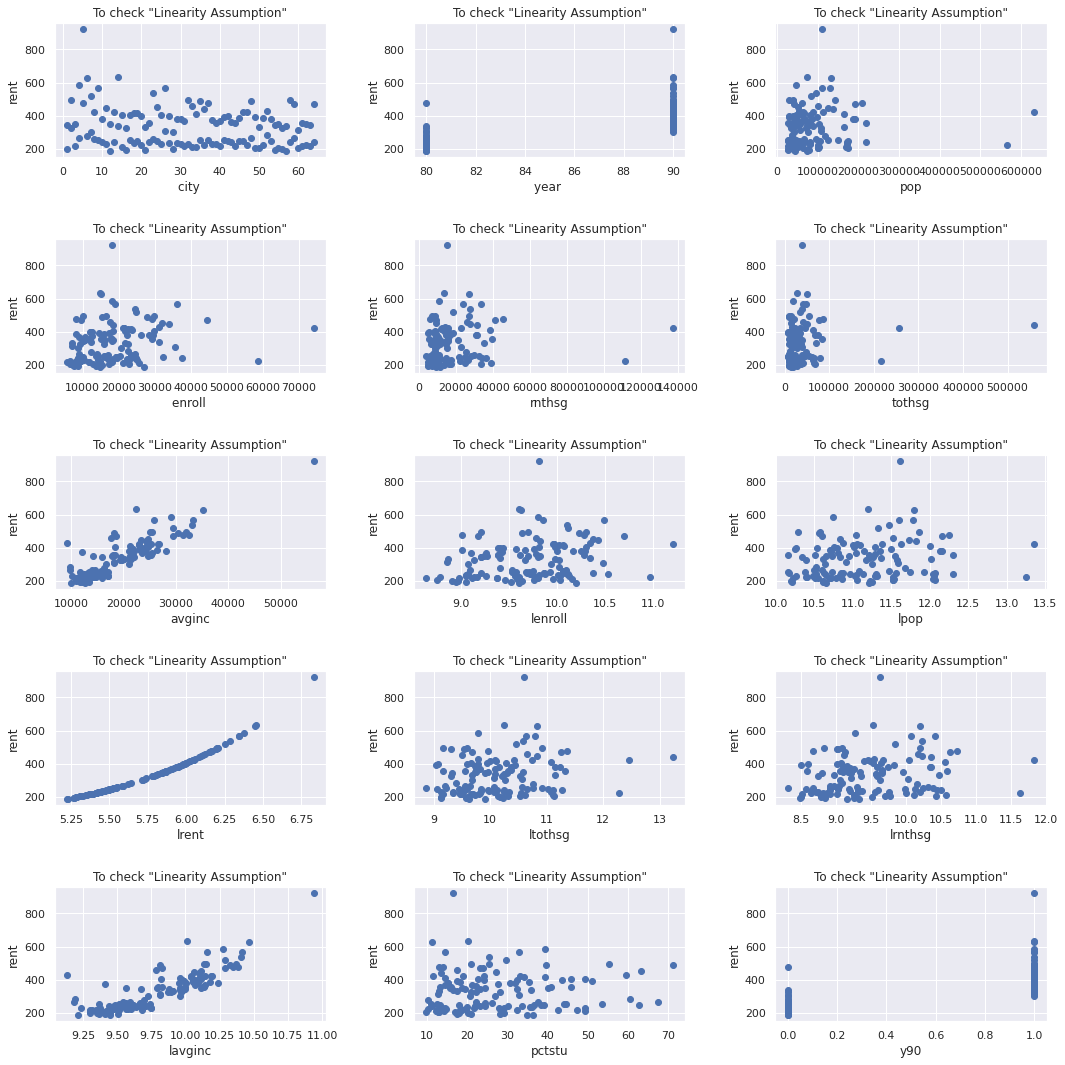

In [ ]:
response_variable = "rent"
regression_analysis1.linearity_assumption(df_rent_final, response_variable)

#### 3.2.1.2. Zero mean & Constant variance

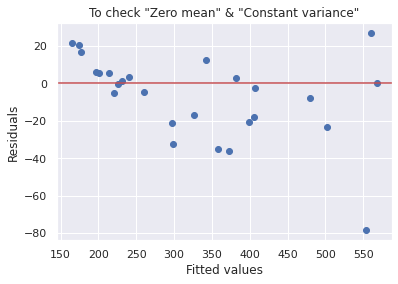

In [ ]:
regression_analysis1.zero_mean_and_constant_variance(Y_test, Yhat)

#### 3.2.1.3. Independency assumption

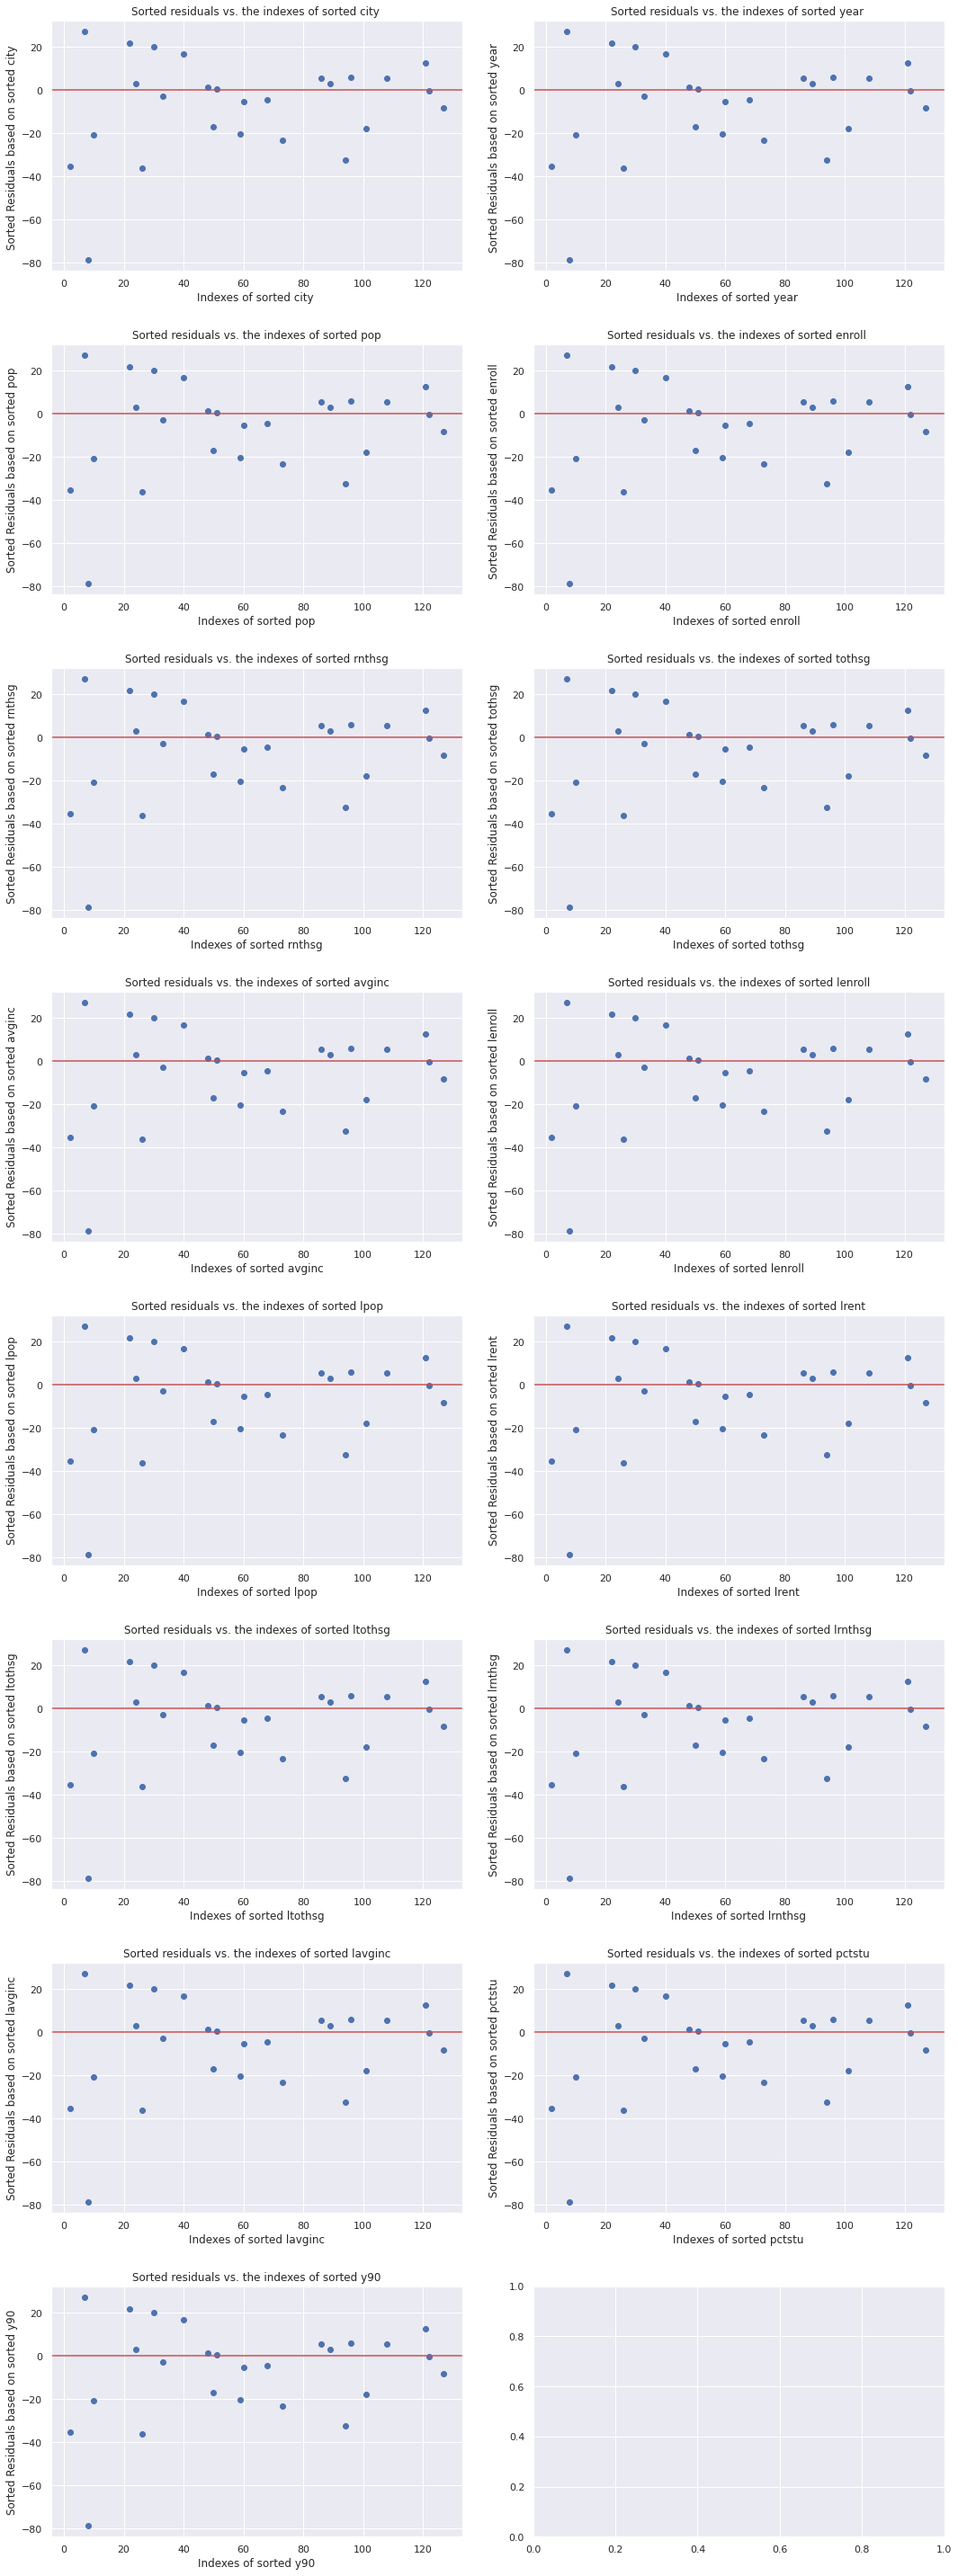

In [ ]:
regression_analysis1.independency_assumption(df_rent_final, response_variable, X_test, Y_test, Yhat)

#### 3.2.1.4. Normality Assumption

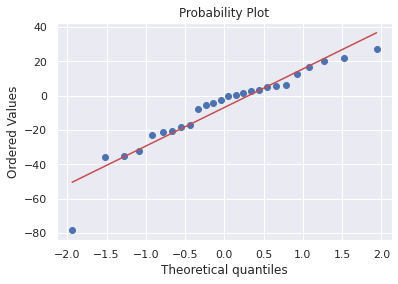

Shapiro–Wilk test:

 1. The Shapiro–Wilk test is more appropriate method for small sample sizes ( n<50 ).

 2.  ShapiroResult(statistic=0.9165416955947876, pvalue=0.0373322032392025)

 3. As p-value = 0.04 which is less than 0.05, the normality assumption is rejected.


In [ ]:
regression_analysis.normality_assumption(Y_test, Yhat)

### 3.2.2. Model selection

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.438e+04, tolerance: 1.317e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.428e+04, tolerance: 1.317e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


'df_rmse:'

(11, 2)

,Models,RMSE
0,XG Boost,4.902827
1,Boosting,7.164325
2,Random Forest,11.905513
3,Decision Tree,16.989816
4,Ridge,19.776718
5,Linear regression,23.253586
6,PCA,23.253586
7,Lasso,24.668870
8,Elastic Net,31.411512
9,Neural Network,37.722544


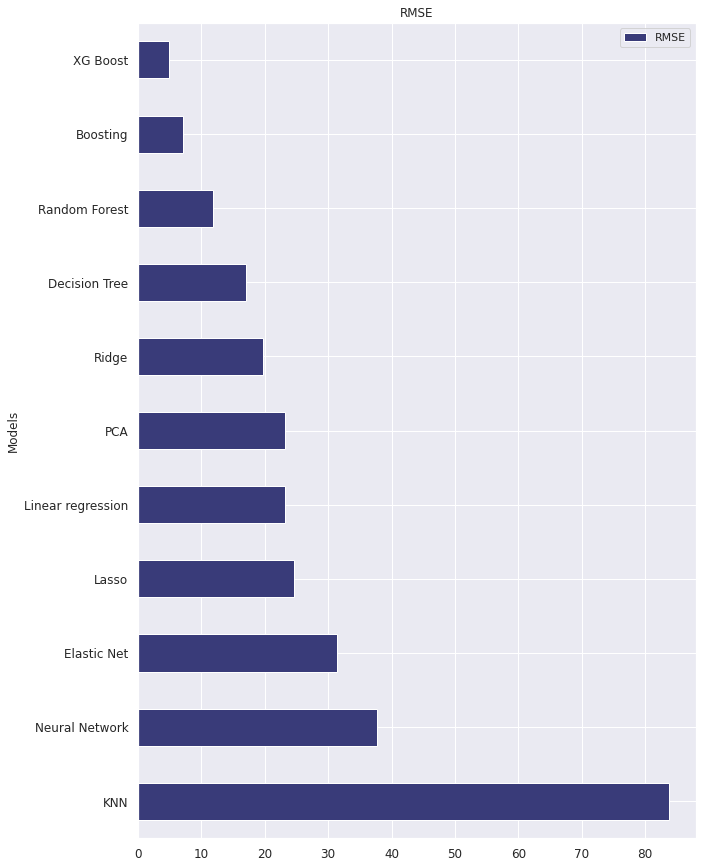

In [ ]:
response_variable = "rent"
model_selection1.best_regression(df_rent_final, response_variable)
